#### In this jupyter notebook, I use k-mean to cluster Galveston's parcels to 60 clusters. The "Galv_Parcel_Complete.geojson" I used is created by Ziyu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
import geopandas as gpd

In [2]:
# Read the dataset that contains categories coded by Ziyu
zone = gpd.read_file("../data/Galv_Parcel_Complete.geojson").to_crs(epsg=4326)
zone.head(5)

,OBJECTID_l,ID,GEOID,NAME,ADDRESS,ADDRESS2,ADDRESS3,CITY,ST,ZIP,...,Shape_Leng,Shape_Area,index_righ,OBJECTID_r,Name_1,Code,Shape_Le_1,Shape_Ar_1,Coded_LANDUSE,geometry
0,1,436684,5912-4000-0001-000,CRVI HPW TRS INC,None,1601 S MOPAC EXPWY STE D-175,None,AUSTIN,TX,78746,...,1427.244952,6.686772e+04,29,30,CITY OF GALVESTON,C30,186359.261489,2.612547e+08,Commercial,"POLYGON ((-95.11211 29.09321, -95.11205 29.093..."
1,2,432154,0121-0001-0010-000,CRVI HPW TRS INC,None,1601 S MOPAC EXPWY STE D-175,None,AUSTIN,TX,78746,...,10675.442458,3.743268e+06,29,30,CITY OF GALVESTON,C30,186359.261489,2.612547e+08,Not of Interest,"POLYGON ((-95.11336 29.09335, -95.11323 29.093..."
2,3,436685,5912-4000-0002-000,CRVI HPW TRS INC,None,1601 S MOPAC EXPWY STE D-175,None,AUSTIN,TX,78746,...,767.678590,3.335669e+04,29,30,CITY OF GALVESTON,C30,186359.261489,2.612547e+08,Commercial,"POLYGON ((-95.11151 29.09375, -95.11166 29.093..."
3,4,436686,5912-4000-0003-000,CRVI HPW TRS INC,None,1601 S MOPAC EXPWY STE D-175,None,AUSTIN,TX,78746,...,921.451609,4.332103e+04,29,30,CITY OF GALVESTON,C30,186359.261489,2.612547e+08,Commercial,"POLYGON ((-95.11156 29.09466, -95.11156 29.094..."
4,5,729563,5912-4000-0000-007,CRVI HPW TRS INC,None,1601 S MOPAC EXPWY STE D-175,None,AUSTIN,TX,78746,...,4161.981292,1.838646e+05,29,30,CITY OF GALVESTON,C30,186359.261489,2.612547e+08,Not of Interest,"POLYGON ((-95.11162 29.09478, -95.11161 29.094..."


In [4]:
# Select the columns I focus
zone = zone[["GEOID","NAME","Shape_Area","geometry","Coded_LANDUSE"]]
zone

,GEOID,NAME,Shape_Area,geometry,Coded_LANDUSE
0,5912-4000-0001-000,CRVI HPW TRS INC,6.686772e+04,"POLYGON ((-95.11211 29.09321, -95.11205 29.093...",Commercial
1,0121-0001-0010-000,CRVI HPW TRS INC,3.743268e+06,"POLYGON ((-95.11336 29.09335, -95.11323 29.093...",Not of Interest
2,5912-4000-0002-000,CRVI HPW TRS INC,3.335669e+04,"POLYGON ((-95.11151 29.09375, -95.11166 29.093...",Commercial
3,5912-4000-0003-000,CRVI HPW TRS INC,4.332103e+04,"POLYGON ((-95.11156 29.09466, -95.11156 29.094...",Commercial
4,5912-4000-0000-007,CRVI HPW TRS INC,1.838646e+05,"POLYGON ((-95.11162 29.09478, -95.11161 29.094...",Not of Interest
...,...,...,...,...,...
28182,0190-0002-0000-000,PORT OF HOUSTON AUTHORITY,7.723167e+06,"POLYGON ((-94.77938 29.34105, -94.78123 29.335...",Not of Interest
28183,0190-0001-0000-000,USA-US GOVERNMENT,2.590386e+07,"POLYGON ((-94.78022 29.34146, -94.78231 29.335...",Industrial
28184,0190-0038-0000-000,USA-US COASTGUARD,5.319753e+07,"POLYGON ((-94.80645 29.35329, -94.80550 29.352...",Industrial
28185,0190-0041-0000-000,CITY-GALVESTON,8.999457e+06,"POLYGON ((-94.79534 29.34979, -94.79581 29.349...",Industrial


In [5]:
# Calculate centroid and area of each column and make them columns
zone["Centroid"] = zone.centroid
zone["Area"] = zone.area
zone.head(5)

C:\Users\Charlie Qiu\AppData\Local\Temp\ipykernel_60108\2613634853.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zone["Centroid"] = zone.centroid
d:\python\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Charlie Qiu\AppData\Local\Temp\ipykernel_60108\2613634853.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zone["Area"] = zone.area
d:\python\lib\site-packages\geopandas\geodat

,GEOID,NAME,Shape_Area,geometry,Coded_LANDUSE,Centroid,Area
0,5912-4000-0001-000,CRVI HPW TRS INC,6.686772e+04,"POLYGON ((-95.11211 29.09321, -95.11205 29.093...",Commercial,POINT (-95.11232 29.09286),5.761574e-07
1,0121-0001-0010-000,CRVI HPW TRS INC,3.743268e+06,"POLYGON ((-95.11336 29.09335, -95.11323 29.093...",Not of Interest,POINT (-95.11815 29.08955),3.223678e-05
2,5912-4000-0002-000,CRVI HPW TRS INC,3.335669e+04,"POLYGON ((-95.11151 29.09375, -95.11166 29.093...",Commercial,POINT (-95.11182 29.09346),2.872953e-07
3,5912-4000-0003-000,CRVI HPW TRS INC,4.332103e+04,"POLYGON ((-95.11156 29.09466, -95.11156 29.094...",Commercial,POINT (-95.11179 29.09430),3.732208e-07
4,5912-4000-0000-007,CRVI HPW TRS INC,1.838646e+05,"POLYGON ((-95.11162 29.09478, -95.11161 29.094...",Not of Interest,POINT (-95.11220 29.09358),1.583564e-06


In [6]:
# Used the weight dictionary we design before to assign category_weight for each row
# Feel free to change the weight here to have a different weighted version of collection point clustering
weight_dictionary = {"Commercial": 3, "Condo":2, "Residential Lot":2, "Residential Acreage":2, "Townhome":1.5, "Industrial":0.5, "Not of Interest": 0.1}
zone["category_weight"] = zone["Coded_LANDUSE"].map(weight_dictionary)
zone.head(5)

d:\python\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,GEOID,NAME,Shape_Area,geometry,Coded_LANDUSE,Centroid,Area,category_weight
0,5912-4000-0001-000,CRVI HPW TRS INC,6.686772e+04,"POLYGON ((-95.11211 29.09321, -95.11205 29.093...",Commercial,POINT (-95.11232 29.09286),5.761574e-07,3.0
1,0121-0001-0010-000,CRVI HPW TRS INC,3.743268e+06,"POLYGON ((-95.11336 29.09335, -95.11323 29.093...",Not of Interest,POINT (-95.11815 29.08955),3.223678e-05,0.1
2,5912-4000-0002-000,CRVI HPW TRS INC,3.335669e+04,"POLYGON ((-95.11151 29.09375, -95.11166 29.093...",Commercial,POINT (-95.11182 29.09346),2.872953e-07,3.0
3,5912-4000-0003-000,CRVI HPW TRS INC,4.332103e+04,"POLYGON ((-95.11156 29.09466, -95.11156 29.094...",Commercial,POINT (-95.11179 29.09430),3.732208e-07,3.0
4,5912-4000-0000-007,CRVI HPW TRS INC,1.838646e+05,"POLYGON ((-95.11162 29.09478, -95.11161 29.094...",Not of Interest,POINT (-95.11220 29.09358),1.583564e-06,0.1


In [7]:
# Calculate the weight of each point using this formula : area * category_weight (assigned in the above cell) and make new weight column
zone["weight"] = zone["Area"] * zone["category_weight"]
zone["Lat"] = zone["Centroid"].y
zone["Long"] = zone["Centroid"].x
zone.head(5)

d:\python\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
d:\python\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
d:\python\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,GEOID,NAME,Shape_Area,geometry,Coded_LANDUSE,Centroid,Area,category_weight,weight,Lat,Long
0,5912-4000-0001-000,CRVI HPW TRS INC,6.686772e+04,"POLYGON ((-95.11211 29.09321, -95.11205 29.093...",Commercial,POINT (-95.11232 29.09286),5.761574e-07,3.0,1.728472e-06,29.092858,-95.112316
1,0121-0001-0010-000,CRVI HPW TRS INC,3.743268e+06,"POLYGON ((-95.11336 29.09335, -95.11323 29.093...",Not of Interest,POINT (-95.11815 29.08955),3.223678e-05,0.1,3.223678e-06,29.089551,-95.118148
2,5912-4000-0002-000,CRVI HPW TRS INC,3.335669e+04,"POLYGON ((-95.11151 29.09375, -95.11166 29.093...",Commercial,POINT (-95.11182 29.09346),2.872953e-07,3.0,8.618860e-07,29.093462,-95.111815
3,5912-4000-0003-000,CRVI HPW TRS INC,4.332103e+04,"POLYGON ((-95.11156 29.09466, -95.11156 29.094...",Commercial,POINT (-95.11179 29.09430),3.732208e-07,3.0,1.119662e-06,29.094299,-95.111791
4,5912-4000-0000-007,CRVI HPW TRS INC,1.838646e+05,"POLYGON ((-95.11162 29.09478, -95.11161 29.094...",Not of Interest,POINT (-95.11220 29.09358),1.583564e-06,0.1,1.583564e-07,29.093582,-95.112204


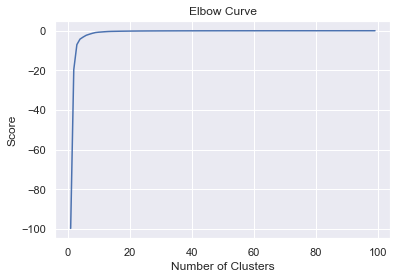

In [8]:
# Draw an elbow plot to find best k
K_clusters = range(1,100)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = zone[['Lat']]
X_axis = zone[['Long']]
score = [kmeans[i].fit(Y_axis, X_axis).score(Y_axis, X_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Any clusters large than ~10 have good score, so using clusters > 10 is rine

In [9]:
# Perform weighted k means with 60 clusters (weight is the "weight" column)
kmeans = KMeans(n_clusters = 60, init ='k-means++')
kmeans.fit(zone[["Lat","Long"]], sample_weight = zone["weight"]) # Compute k-means clustering.
zone['cluster_label'] = kmeans.fit_predict(zone[["Lat","Long"]], sample_weight = zone["weight"])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(zone[["Lat","Long"]], sample_weight = zone["weight"]) # Labels of each point
zone.head(10)

d:\python\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,GEOID,NAME,Shape_Area,geometry,Coded_LANDUSE,Centroid,Area,category_weight,weight,Lat,Long,cluster_label
0,5912-4000-0001-000,CRVI HPW TRS INC,6.686772e+04,"POLYGON ((-95.11211 29.09321, -95.11205 29.093...",Commercial,POINT (-95.11232 29.09286),5.761574e-07,3.0,1.728472e-06,29.092858,-95.112316,34
1,0121-0001-0010-000,CRVI HPW TRS INC,3.743268e+06,"POLYGON ((-95.11336 29.09335, -95.11323 29.093...",Not of Interest,POINT (-95.11815 29.08955),3.223678e-05,0.1,3.223678e-06,29.089551,-95.118148,34
2,5912-4000-0002-000,CRVI HPW TRS INC,3.335669e+04,"POLYGON ((-95.11151 29.09375, -95.11166 29.093...",Commercial,POINT (-95.11182 29.09346),2.872953e-07,3.0,8.618860e-07,29.093462,-95.111815,34
3,5912-4000-0003-000,CRVI HPW TRS INC,4.332103e+04,"POLYGON ((-95.11156 29.09466, -95.11156 29.094...",Commercial,POINT (-95.11179 29.09430),3.732208e-07,3.0,1.119662e-06,29.094299,-95.111791,34
4,5912-4000-0000-007,CRVI HPW TRS INC,1.838646e+05,"POLYGON ((-95.11162 29.09478, -95.11161 29.094...",Not of Interest,POINT (-95.11220 29.09358),1.583564e-06,0.1,1.583564e-07,29.093582,-95.112204,34
5,5912-4000-0000-003,PROPERTY OWNERS ASSOCIATION OF POINTE WEST INC,1.468714e+05,"POLYGON ((-95.10903 29.09508, -95.10902 29.095...",Condo,POINT (-95.11035 29.09432),1.265828e-06,2.0,2.531657e-06,29.094320,-95.110354,34
6,5912-2000-0000-006,PROPERTY OWNERS ASSOCIATION OF POINTE WEST INC,1.871317e+03,"POLYGON ((-95.10883 29.09511, -95.10881 29.095...",Not of Interest,POINT (-95.10876 29.09493),1.609684e-08,0.1,1.609684e-09,29.094933,-95.108757,34
7,5912-2001-0001-000,HELLAIL INC LLC,3.999991e+03,"POLYGON ((-95.10874 29.09556, -95.10886 29.095...",Residential Lot,POINT (-95.10888 29.09560),3.444957e-08,2.0,6.889913e-08,29.095596,-95.108884,34
8,5912-2001-0002-000,RASH KYLE L,4.000009e+03,"POLYGON ((-95.10863 29.09565, -95.10874 29.095...",Residential Lot,POINT (-95.10877 29.09569),3.444976e-08,2.0,6.889951e-08,29.095689,-95.108769,34
9,5912-2001-0003-000,WHITE KURT & VICKI,3.999043e+03,"POLYGON ((-95.10851 29.09575, -95.10863 29.095...",Residential Lot,POINT (-95.10865 29.09578),3.443038e-08,2.0,6.886075e-08,29.095781,-95.108653,34


In [10]:
# Create geodataframe for each polygon's centroid
zone_gdf = gpd.GeoDataFrame(
    zone, geometry=gpd.points_from_xy(zone.Long, zone.Lat, crs='epsg:4326'),crs=4326) 
zone_gdf["polygon"] = zone["geometry"]
zone_gdf.head(5)

,GEOID,NAME,Shape_Area,geometry,Coded_LANDUSE,Centroid,Area,category_weight,weight,Lat,Long,cluster_label,polygon
0,5912-4000-0001-000,CRVI HPW TRS INC,6.686772e+04,POINT (-95.11232 29.09286),Commercial,POINT (-95.11232 29.09286),5.761574e-07,3.0,1.728472e-06,29.092858,-95.112316,34,POINT (-95.11232 29.09286)
1,0121-0001-0010-000,CRVI HPW TRS INC,3.743268e+06,POINT (-95.11815 29.08955),Not of Interest,POINT (-95.11815 29.08955),3.223678e-05,0.1,3.223678e-06,29.089551,-95.118148,34,POINT (-95.11815 29.08955)
2,5912-4000-0002-000,CRVI HPW TRS INC,3.335669e+04,POINT (-95.11182 29.09346),Commercial,POINT (-95.11182 29.09346),2.872953e-07,3.0,8.618860e-07,29.093462,-95.111815,34,POINT (-95.11182 29.09346)
3,5912-4000-0003-000,CRVI HPW TRS INC,4.332103e+04,POINT (-95.11179 29.09430),Commercial,POINT (-95.11179 29.09430),3.732208e-07,3.0,1.119662e-06,29.094299,-95.111791,34,POINT (-95.11179 29.09430)
4,5912-4000-0000-007,CRVI HPW TRS INC,1.838646e+05,POINT (-95.11220 29.09358),Not of Interest,POINT (-95.11220 29.09358),1.583564e-06,0.1,1.583564e-07,29.093582,-95.112204,34,POINT (-95.11220 29.09358)


In [11]:
# Create geodataframe for each cluster center
center_df = pd.DataFrame(centers, columns = ['lat','long'])
center_gdf = gpd.GeoDataFrame(
    center_df, geometry=gpd.points_from_xy(center_df.long, center_df.lat, crs='epsg:4326'),crs=4326) 
center_gdf.head(5)

,lat,long,geometry
0,29.201904,-94.944011,POINT (-94.94401 29.20190)
1,29.298048,-94.819682,POINT (-94.81968 29.29805)
2,29.131075,-95.061183,POINT (-95.06118 29.13107)
3,29.264259,-94.877844,POINT (-94.87784 29.26426)
4,29.339165,-94.790654,POINT (-94.79065 29.33916)


In [12]:
# Create buffer zone as the coverage area (In Galveston, 0.004° = 1/4 mile = 5-min walking distance)
# Create geodataframe for each coverage area
buffer = center_gdf.buffer(0.004)
center_df_1 = pd.DataFrame(centers, columns = ['lat','long'])
center_gdf_1 = gpd.GeoDataFrame(
    center_df_1, geometry=buffer,crs=4326) 
center_gdf_1

C:\Users\Charlie Qiu\AppData\Local\Temp\ipykernel_60108\1240696157.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffer = center_gdf.buffer(0.004)


,lat,long,geometry
0,29.201904,-94.944011,"POLYGON ((-94.94001 29.20190, -94.94003 29.201..."
1,29.298048,-94.819682,"POLYGON ((-94.81568 29.29805, -94.81570 29.297..."
2,29.131075,-95.061183,"POLYGON ((-95.05718 29.13107, -95.05720 29.130..."
3,29.264259,-94.877844,"POLYGON ((-94.87384 29.26426, -94.87386 29.263..."
4,29.339165,-94.790654,"POLYGON ((-94.78665 29.33916, -94.78667 29.338..."
5,29.264176,-94.840561,"POLYGON ((-94.83656 29.26418, -94.83658 29.263..."
6,29.245908,-94.917369,"POLYGON ((-94.91337 29.24591, -94.91339 29.245..."
7,29.170826,-95.001971,"POLYGON ((-94.99797 29.17083, -94.99799 29.170..."
8,29.106732,-95.096759,"POLYGON ((-95.09276 29.10673, -95.09278 29.106..."
9,29.287440,-94.801409,"POLYGON ((-94.79741 29.28744, -94.79743 29.287..."


In [53]:
# Create the geojson for parcel with weights. This shapefile is equal to the 
# galveston_parcel_skater.shp in the galveston_parcel_skater folder under the
# Skater_Clustering algorithm. I used this shapefile for skater clustering
polygon = gpd.read_file("Galv_Parcel_Complete.geojson").to_crs(epsg=4326)
zone_gdf_copy = zone_gdf[:]
zone_gdf_copy = zone_gdf_copy.iloc[:,[0,1,2,4,6,7,8,9,10,11]]
zone_gdf_copy = gpd.GeoDataFrame(zone_gdf_copy, geometry = polygon.geometry)
zone_gdf_copy.to_file("Galveston_parcel_polygon.geojson", driver="GeoJSON")

In [24]:
# Create the geojson for parcel centriod
zone_gdf[["geometry","cluster_label","Coded_LANDUSE","Lat","Long"]].to_file("galveston_parcel_centroid_60.geojson", driver="GeoJSON")

In [27]:
# Create the geojson for cluster center (collection point)'s buffer zone (coverage area)
center_gdf_1.to_file("galveston_parcel_cluster_buffer_60.geojson", driver="GeoJSON")

In [26]:
# Create the geojson for cluster center (collection point)
center_gdf.to_file("galveston_parcel_cluster_center_60.geojson", driver="GeoJSON")

#### Please use Calculating_Distance_Clct_Galveston_60 for further operation
####  I use QGIS and ArcGIS to finish mapping, the links are in the README.md